##Lab Task 02

In [26]:
#importing necessary libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# #imporot the patch for the google colab
from google.colab.patches import cv2_imshow

In [27]:
#specifying the folder in the google drive
folder_name = '/content/drive/MyDrive/CO543-Image Processing/Lab4/'

In [28]:
#connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#reading two csv files from the google drive to load the csv files as pandas dataframe
training_df = pd.read_csv(folder_name +'fashion-mnist_train.csv')
testing_df = pd.read_csv(folder_name +'fashion-mnist_test.csv')

Getting traing and testing data frames

In [30]:
x_train = training_df.drop(['label'], axis=1).to_numpy()
x_label = training_df['label'].to_numpy()

y_test = testing_df.drop(['label'], axis=1).to_numpy()
y_label = testing_df['label'].to_numpy()

x_train = x_train.reshape(x_train.shape[0], 28, 28).astype('float32')/255
y_test = y_test.reshape(y_test.shape[0], 28, 28).astype('float32')/255

In [31]:
classes = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Displaying the first few training data

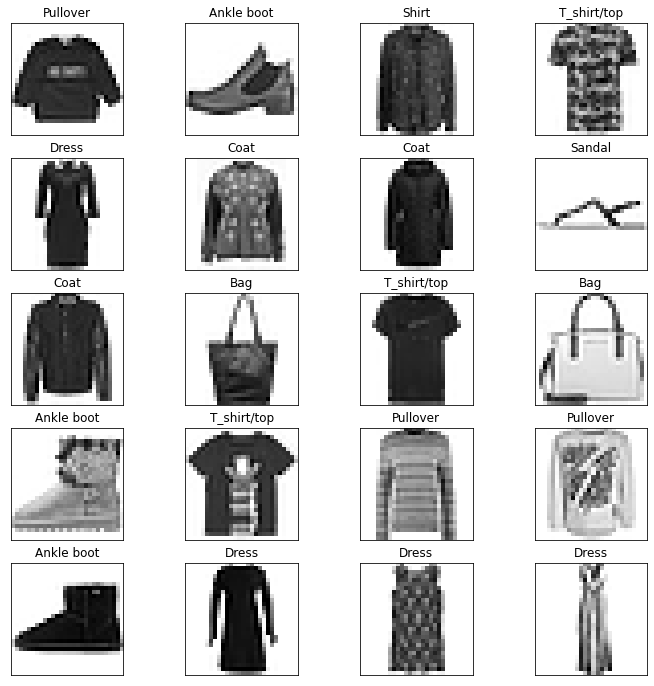

In [32]:
#getting the images
images = x_train[:20].reshape(20,28,28)

#setting the plot size
plt.figure(figsize=(12,12))

#printing each image in a subplot
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],  cmap=plt.cm.binary)
  plt.title(classes[x_lab[i]])

###a. Initially train a classifier using artificial neural network while treating pixels as different features

Creating the artificial neural network

In [60]:
#importing machine learning libraries
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import tensorflow as tf


#defining the model structure

#lets create a sequenctial model
model = Sequential()
#adding a flatten layer with input shape 28,28 since images are 28,28
model.add(Flatten(input_shape=((28,28))))

#adding a dense layer
model.add(Dense(100,activation = "relu"))

#adding a softmax layer
model.add(Dense(10,activation="softmax"))

In [61]:
#compiling the model

#set the optimizer as the adam
#set the loss function to the sparse categorical cross entrophy
#set the accuracy as the metrics
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [62]:
#fitting the model

#setting the parameters to train the model
#train for 20 epochs
#set the validation split as 0.2
#set the verbose
history = model.fit(x_train, x_label, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5293 - accuracy: 0.8135 - val_loss: 0.4324 - val_accuracy: 0.8491
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3967 - accuracy: 0.8576 - val_loss: 0.3800 - val_accuracy: 0.8647
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3557 - accuracy: 0.8720 - val_loss: 0.4125 - val_accuracy: 0.8540
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3334 - accuracy: 0.8764 - val_loss: 0.3606 - val_accuracy: 0.8743
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8869 - val_loss: 0.3694 - val_accuracy: 0.8725
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2968 - accuracy: 0.8906 - val_loss: 0.3496 - val_accuracy: 0.8741
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2823 - accuracy: 0.8945 - val_loss: 0.3330 - val_accuracy:

Model Evaluation

First check how the accuracy and loss changes.Lets define a function for that.

In [63]:
def eval_accuracy_loss(history):
  #plotting the traing and validation accuracy

  #getting the parameters for the testing set
  accuracy_testing = history.history['accuracy']
  loss_testing = history.history['loss']
  number_of_epochs = range(len(accuracy_testing))

  #getting the parameters for the validation set
  accuracy_validation = history.history['val_accuracy']
  loss_validation = history.history['val_loss']

  #plotting the accuracy
  plt.figure(figsize=(10,7))
  plt.plot(number_of_epochs, accuracy_testing, 'ro', label='Accuracy variation : Training set')
  plt.plot(number_of_epochs, accuracy_validation, 'g', label='Accuracy variation : Validation set')
  plt.title('Accuracy Variation')
  plt.legend()

  #pltting the loss
  plt.figure(figsize=(10,7))
  plt.plot(number_of_epochs, loss_testing, 'ro', label='Loss variation : Training set')
  plt.plot(number_of_epochs, loss_validation, 'g', label='Loss variation : Validation set')
  plt.title('Loss Variation')
  plt.legend()

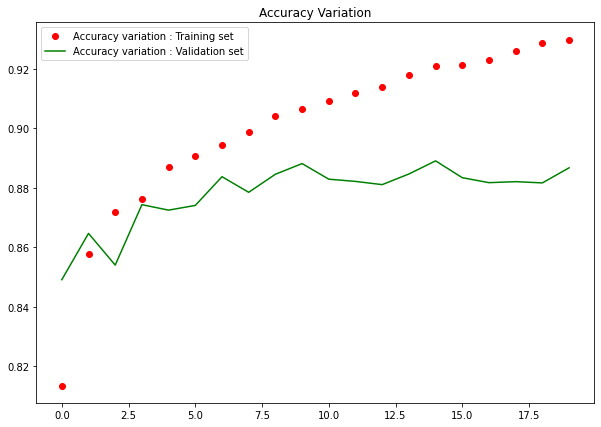

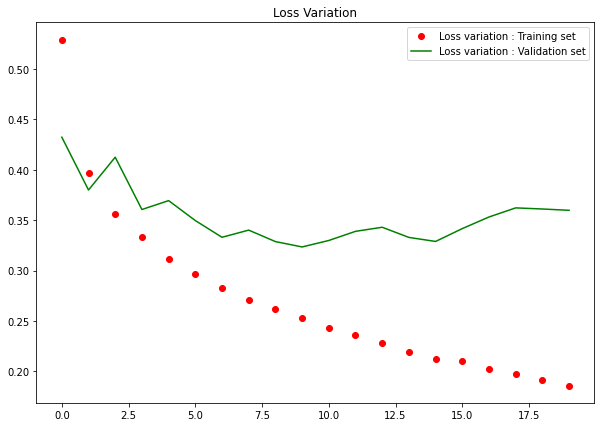

In [64]:
#lets call above function for the model
eval_accuracy_loss(history)

Then check the accuracy per class so that we can what is the class which gives the highest accracy. Lets define a function for that.

In [66]:
def barChar_eval(model,classes):
  #getting the predictions for the traing set
  train_pred = model.predict(x_train)

  #getting train predictions
  train_pred = np.argmax(train_pred, axis = 1)

  #getting the accuracy of the class
  class_acc = [np.mean(train_pred[x_label == i] == i) for i in range(10)]

  #getting a bar chart
  plt.figure(figsize = (10,7))
  plt.bar(range(10), class_acc)
  plt.xticks(range(10), classes)
  plt.xlabel('Classes')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Against Class')

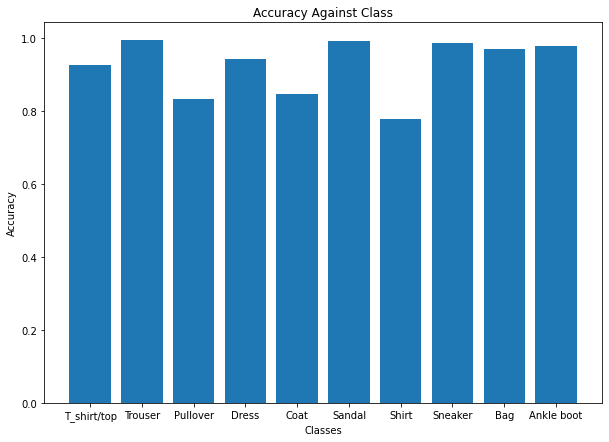

In [67]:
#lets call above function to get the bar chart
barChar_eval(model,classes)

Model Testing

In [80]:
#lets define a function for this as well
def test_model(model):
  #getting the first 10 values of predictions
  pred = model.predict(y_test[:10])

  #getting the max 
  pred = np.argmax(pred, axis=1)

  #Printing images along with the label
  plt.figure(figsize=(8,8))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(y_test[i], cmap="binary")
    plt.title(classes[y_label[i]]+":"+classes[pred[i]])

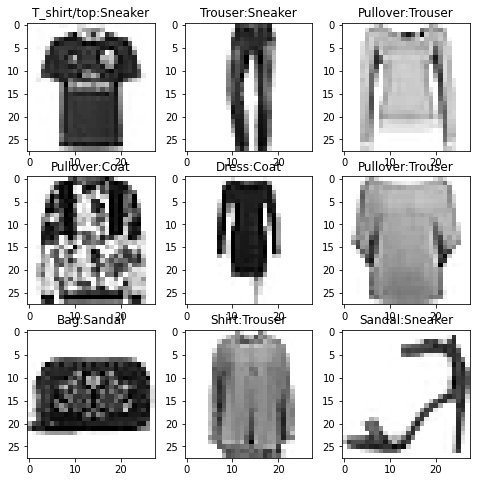

In [81]:
test_model(model)

###b. Train a Convolutional neural network(CNN) for the above data set considering data points as images.

Convolutional Neural Network

In [74]:
#model definition using tensorflow
model_convo = tf.keras.models.Sequential()

#adding layers to the model
model_convo.add(
    #adding a convolutional 2D layer to add a kernal to scan the image
    #this we apply 32 filters with the size of 3x3 without using the padding
    #activation of the layer is set as the relu
    #since we input one image with 28x28 pixels, input size is set to 28x28x1
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)
    )   
)

model_convo.add(
    #adding a maxpool layer
    #since this will reduce the number of parameters
    #hence the training time will be reduced
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2)
    )
)

model_convo.add(
    #adding a dropout layer to reduce overfitting
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model_convo.add(
    #Flatten layer to convert the 3D output to 1D array
    tf.keras.layers.Flatten()
)

model_convo.add(
    #adding a dense layer to make completed graph
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

model_convo.add(
    #output layer is with 10 neurons
    tf.keras.layers.Dense(
        units=10,
        activation='softmax'
    )
)

In [75]:
#compile the model
#use sparse_categorical_crossentrophy becasue there are more than 2 claases
#use adam as the optimizer
#use accuracy as the metrics
model_convo.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [76]:
#fit/train the model
#traing the model
#use x_train as the x values
#use x_labels as the labels
#use 256 as batch size
#use 10 epochs
#divide the traing set to 0.3 to get the validation set
history = model_convo.fit(x_train,x_label,batch_size=256,epochs=10,validation_split=0.3)

Epoch 1/10
165/165 [==============================] - 3s 13ms/step - loss: 0.5727 - accuracy: 0.8034 - val_loss: 0.4581 - val_accuracy: 0.8298
Epoch 2/10
165/165 [==============================] - 2s 11ms/step - loss: 0.3719 - accuracy: 0.8679 - val_loss: 0.3447 - val_accuracy: 0.8802
Epoch 3/10
165/165 [==============================] - 2s 13ms/step - loss: 0.3221 - accuracy: 0.8850 - val_loss: 0.3194 - val_accuracy: 0.8868
Epoch 4/10
165/165 [==============================] - 2s 11ms/step - loss: 0.2961 - accuracy: 0.8945 - val_loss: 0.3113 - val_accuracy: 0.8879
Epoch 5/10
165/165 [==============================] - 2s 11ms/step - loss: 0.2793 - accuracy: 0.8996 - val_loss: 0.2919 - val_accuracy: 0.8988
Epoch 6/10
165/165 [==============================] - 2s 12ms/step - loss: 0.2602 - accuracy: 0.9062 - val_loss: 0.2747 - val_accuracy: 0.9026
Epoch 7/10
165/165 [==============================] - 2s 14ms/step - loss: 0.2438 - accuracy: 0.9108 - val_loss: 0.2787 - val_accuracy: 0.8995

Model evaluation

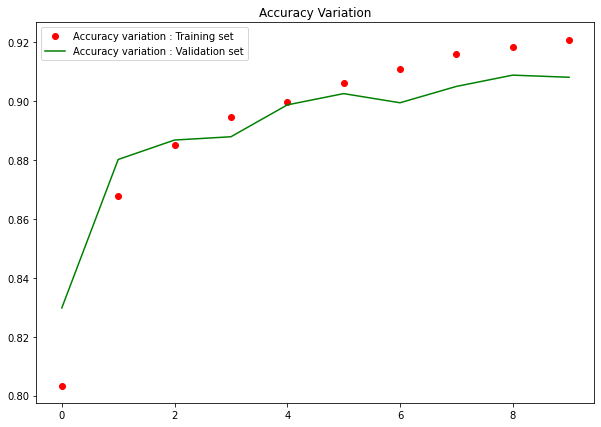

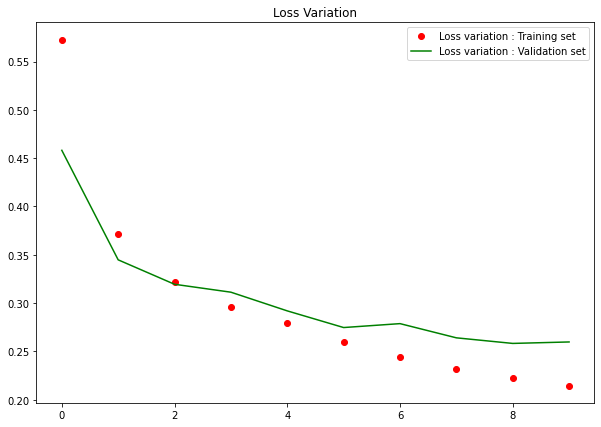

In [77]:
#lets evaluate the mode by checking accuracy and loss variations
eval_accuracy_loss(history)

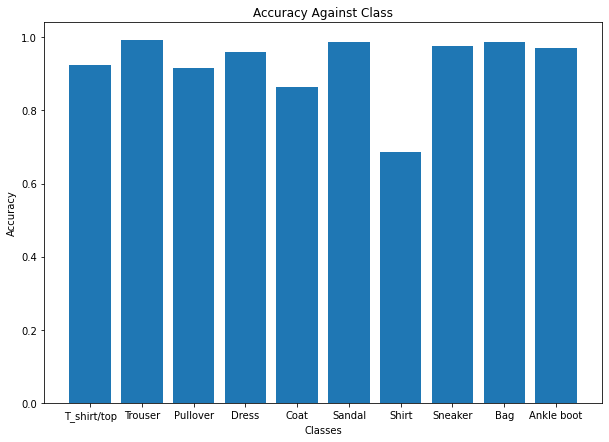

In [78]:
#lets draw the bar charts and check the accuracy per class
barChar_eval(model_convo,classes)

Model Testing

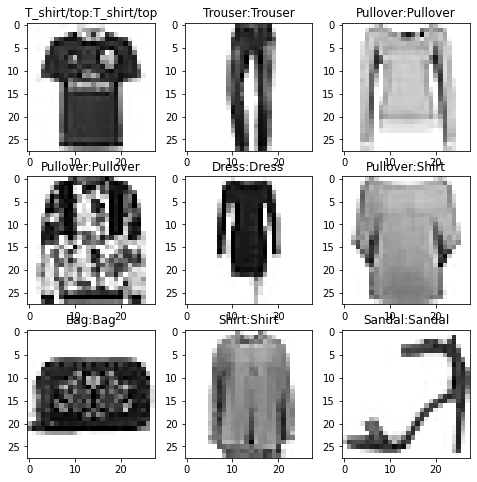

In [82]:
test_model(model_convo)

###c. Identify the difference between above 2 models


When observing the accuracy and loss curves of the ANN model, it can be seen that, after 3 epochs the model is overfitting the data while training. This can be seen , because after ephoch=3 validation and training curves flows such that the difference between them is increasing.<br><br>

But this is not the case with the CNN model. Because, after both accuracy and loss curves of the traing and validation data sets go along with each other and the difference is not increasing. Therefore the accuracy of the CNN model is quite high compared to the ANN model.

###f. Discuss having more or less nodes in a single layer and having a deep or a shallow network against the computational complexity.


- ANN have an input layer, hidden layers and an output layers and nodes or the neurons for each layer.
- These neurons has a weight and threshold associated with them.
- If the neuron give an output , the output should be greater than the threshold value. Otherwise neurons will not be activated and will not pass data to the next neuron in the next layer.
- Therefore increasing the number of layers will obviously increase the number of neurons in the model which result in increasing the complexity of the model due to high number of parameters.
- Due to some of the neurons will be vanish(becuase they do not have a good enough output than the threshold) and because of that, the model is tend to overfit.
- Also increasing the number of layers and neurons within them will obviously lead the model to study the dataset more than intended and that will result in overfitting the model.
- We can reduce the overfitting by introducing dropout layers after hidden layers.


- For a larger dataset , ANN would not be a good solution as all the details related to the image must be explicitly given by a data points. For a larget dataset , this will take a lot of time.
- But with CNN model, the model it self will extract those features from the image without having to explicitly defining them. This makes CNN the perfect model to train larger datasets.
- Also since ANN prefer 1D vectors the number of parameters would be increment exponentially when training with ANN. This will result in higher memory and time complexity.
-Considering most of the aspects CNN would be the ideal technique because it will work with less human supervision and with less memroy and time complexities.

###g. Discuss about the way you defined the optimum neural network architecture for the above problem.

-Done when defining the model.